# **HR Attrition - Introduction and Methodology**
Group 10:
- Filipe Brandão Carmo
- João Silva
- Rita Marques
- Sara Henriques

The objective of this capstone project is to synthesize and apply the diverse skills and knowledge you have acquired throughout your coursework. You will
develop an end-to-end data science solution focused on predicting employee attrition. The project is designed to challenge you to integrate your
understanding of data exploration, feature engineering, machine learning, and model deployment. Additionally, you will refine your ability to communicate
complex results through a polished, professional presentation.

GitHub Repository: Maintain a well-organized GitHub repository containing all project files, including code, data, documentation, and the slide
deck. Ensure the repository is structured and commented to be understandable by others.

Deliverables:
1. Jupyter Notebook/Python Scripts: Detailed documentation of your entire
workflow, from EDA to modeling and deployment.
2. Final Presentation: A polished, professional presentation with
accompanying slides, ready for a 10-minute delivery.
3. Backup Slides: Additional slides to address potential questions or provide
further details.
4. GitHub Repository: A complete and organized repository with all relevant
files and documentation.

# **Part I. Understanding the Business Problem**

High turnover rates are costly and disruptive, making it essential for HR to anticipate which employees are likely to leave. We are tasked with assisting a multinational consultancy firm in predicting employee attrition.

The primary goal is to predict whether an employee will leave the company, based on the data provided. Secondary goals include identifying key factors influencing attrition and recommending strategies to retain valuable employees.

The HR department and executive management will be the primary consumers of your insights, and they expect actionable recommendations based on your analysis.

# **Part II - Data Integration**

The dataset provided (HR_DS.csv) contains various attributes related to employee demographics, job satisfaction, work experience, and compensation.

Explore the data types, distribution, and completeness.
Identify any missing values or inconsistencies that need to be addressed.´

Preprocessing:
- Handle missing data through appropriate imputation techniques.
- Encode categorical variables using methods such as one-hot encoding or label encoding, considering the impact on the model.
- Standardize or normalize numerical features if necessary, based on the algorithms you plan to use.

Technologies to be used and Python packages to import:
- Programming & Data Analysis: Python (Pandas, NumPy, Scikit-learn, XGBoost, TensorFlow/PyTorch, etc.)
- Development Environment: VS Code
- Version Control: Git/GitHub
- Model Deployment: Hugging Face Spaces (Optional)
- Data Visualization: Power BI, Plotly, Matplotlib, Seaborn
- Model Interpretation: SHAP, LIME

### **1. Import the needed libraries and dataset**

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # filter method


In [2]:
# import data here and perform basic .shape() .info()
HR = pd.read_csv('HR_Attrition_Dataset.csv')
print(f"The table has the following format: ", HR.shape)
print(HR.info(max_cols=35))

The table has the following format:  (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470

### **2. Set index**

A quick exploration in the dataset allowed to undestand that EmployeeNumber had the potential to be used as index and since those values are unique.

In [3]:
pd.set_option('display.max_columns', None)
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
unique_values = HR['EmployeeNumber'].is_unique
print (unique_values)

True


In [5]:
HR.set_index('EmployeeNumber', inplace = True)
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### **3. Check duplicates**

The command below was used to find duplicated lines - any register was found on those conditions.

In [6]:
HR[HR.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### **4. Check missing values**

In [7]:
HR.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

The dataset does not contain any variables with missing values, so there is no need for their imputation.

# **Part III. Exploratory Data Analysis**

- Univariate Analysis: Conduct a thorough analysis of individual variables to understand their distributions and detect any anomalies or patterns.
- Bivariate and Multivariate Analysis: Examine the relationships between key features, particularly how they correlate with the target variable (Attrition). Utilize heatmaps, pair plots, and correlation matrices to uncover potential multicollinearity issues.
- Visualization: Develop insightful visualizations to communicate findings effectively. Consider using tools like Seaborn or Plotly to create interactive or
complex visualizations.
- Feature Engineering: Assess feature importance using techniques like feature selection or model-based importance scoring (e.g., Random Forest feature importances).

## **1. Info & Shape**

The dataset has a total of 1470 lines with 34 attributes.

In [8]:
HR.shape

(1470, 34)

In [9]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
pd.set_option('display.max_columns', None)
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## **2. Univariate data analysis**

In [11]:
# perform .describe() and histograms/variable for univariate data analysis
HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


To better understand the distribution of the numerical variables in the dataset, we analyze their **skewness** and **kurtosis**.

In [12]:
HR.skew(numeric_only=True)

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

DailyRate, EmployeeCount, and HourlyRate skewness values are extremely close to 0, suggesting that these numerical features are **approximately symmetrically distributed**.

In [13]:
HR.kurt(numeric_only=True)

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EmployeeCount               0.000000
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StandardHours               0.000000
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

Review - All values are negative, indicating that the distributions have lighter tails than a normal distribution (fewer outliers). This confirms that most values cluster around the mean, and extreme values are rare in the numerical features.

Now for the categorical variables...

In [14]:
HR.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [15]:
HR.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [16]:
HR_cat = HR.select_dtypes(include=['object'])
for col in HR_cat.columns:
  print(HR_cat[col].value_counts(dropna=False, normalize=True), end='\n\n')

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.

Over18 does not vary, so it is not important for the analysis.

Attrition, Gender, and OverTime are binary classes, while the remaining categorical variables are multiclass.

Most categorical variables have non-balanced distributions (one class is more represented than the others)

In [17]:
HR_clean = HR.drop(['Over18'], axis = 1)

# Rita comment: será que também devemos tirar o EmployeeCount por ser uma constante?
HR_clean.shape

(1470, 33)

## **3. Multivariate data analysis**

Now we shall inspect how the Attrition behaves according to the remaining variables.

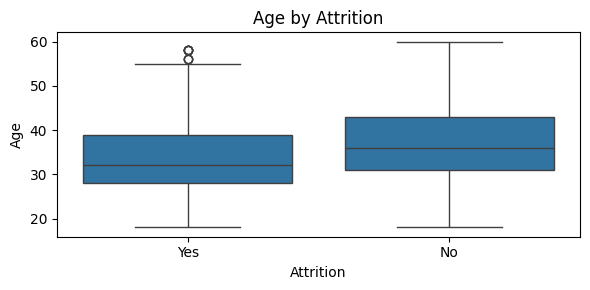

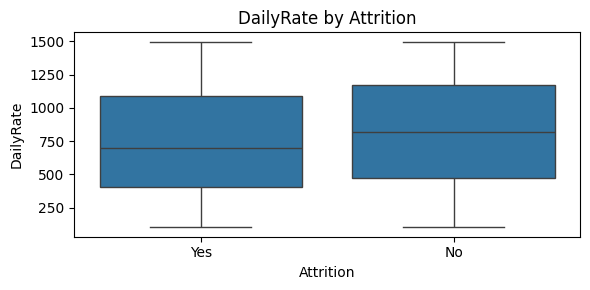

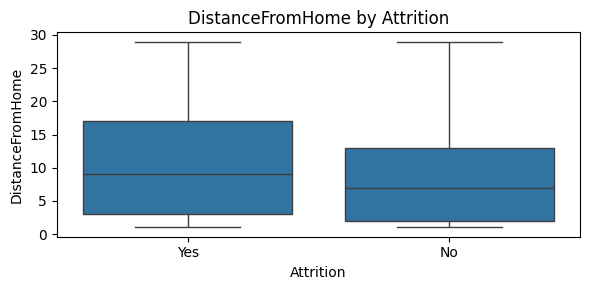

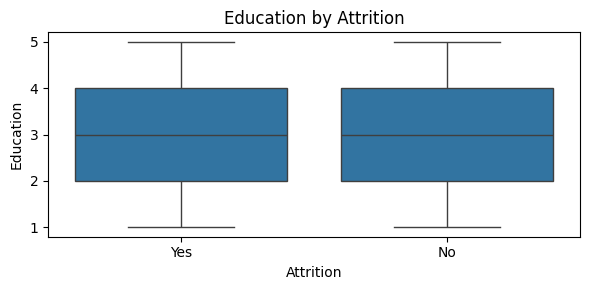

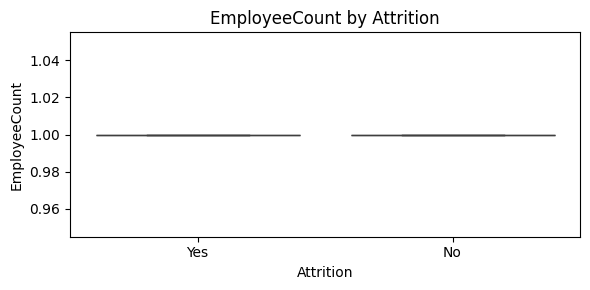

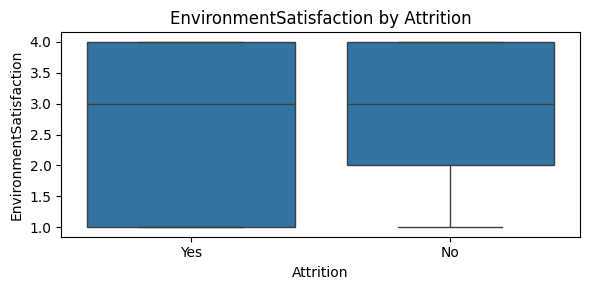

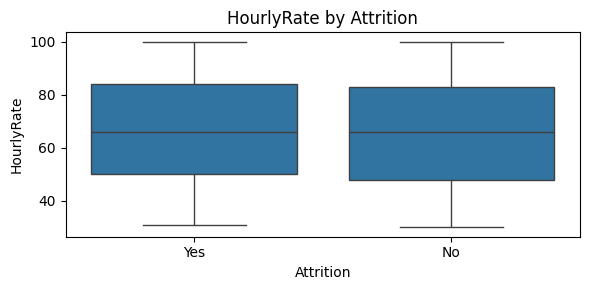

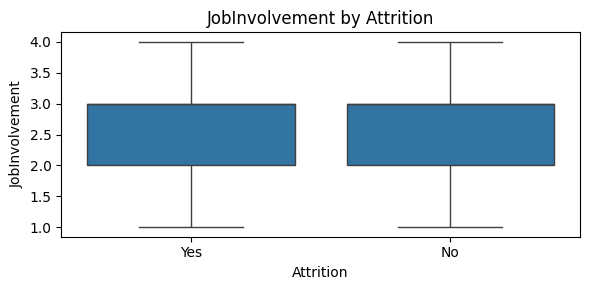

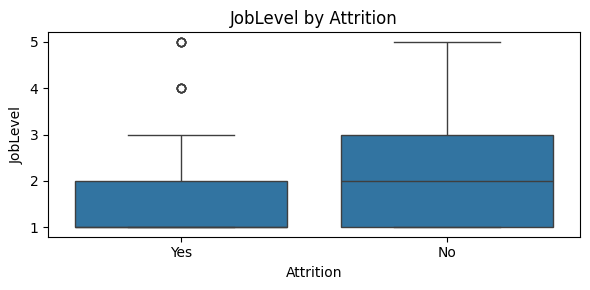

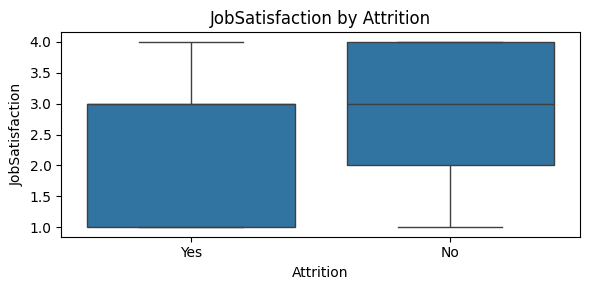

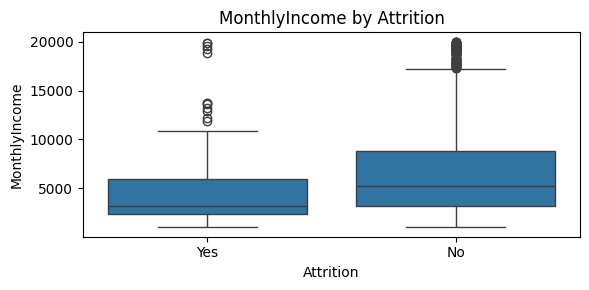

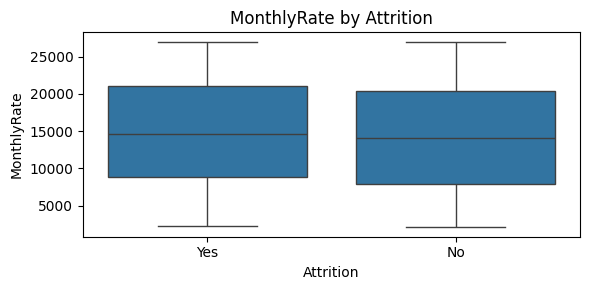

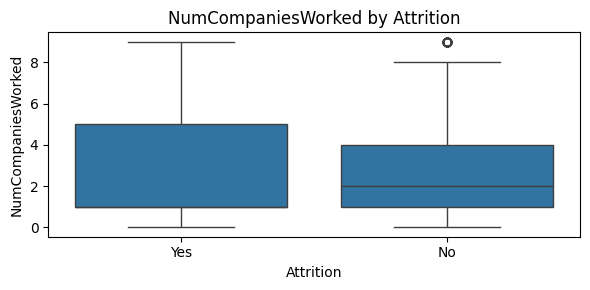

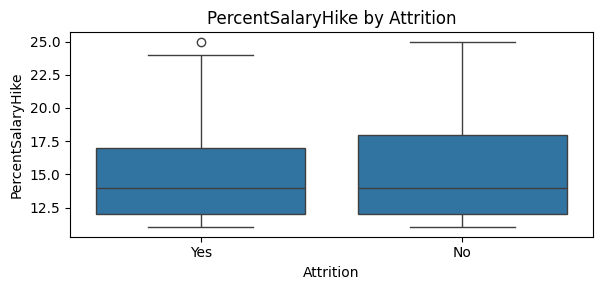

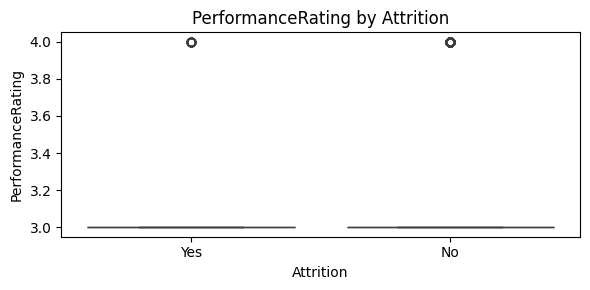

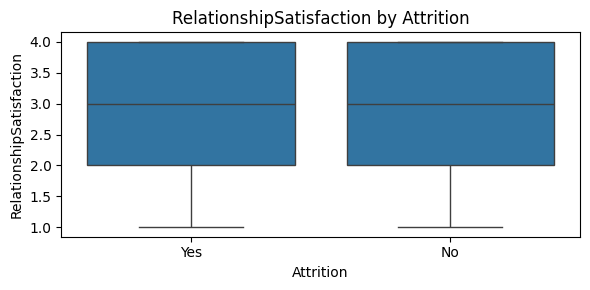

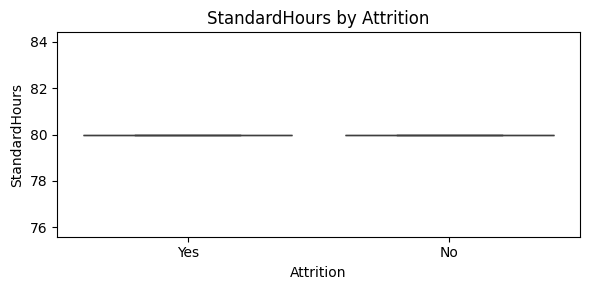

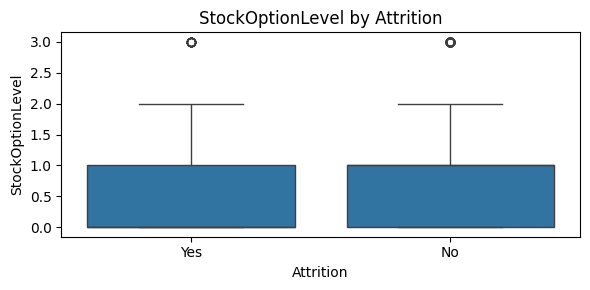

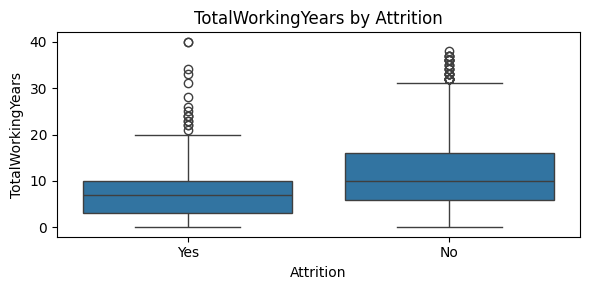

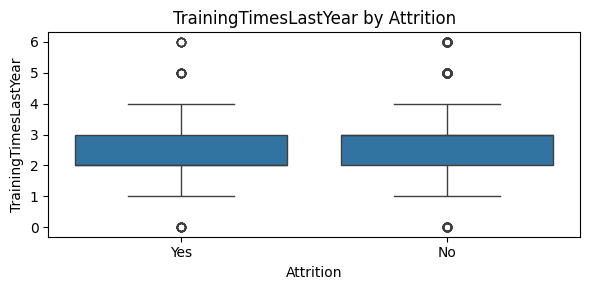

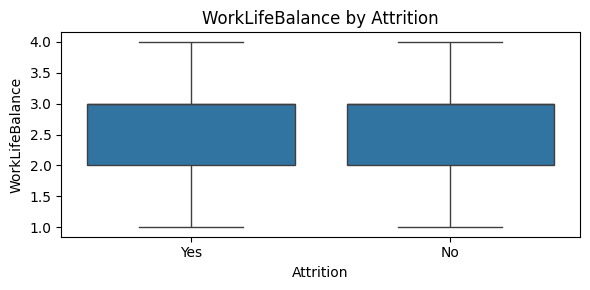

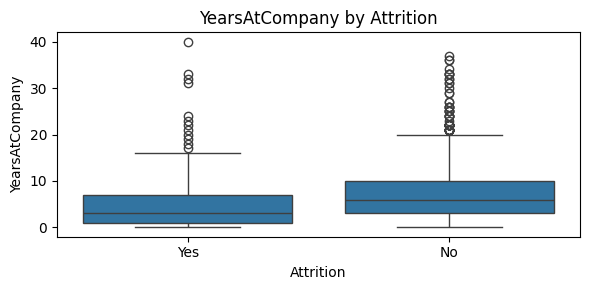

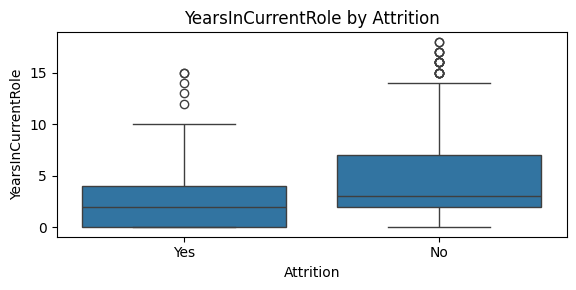

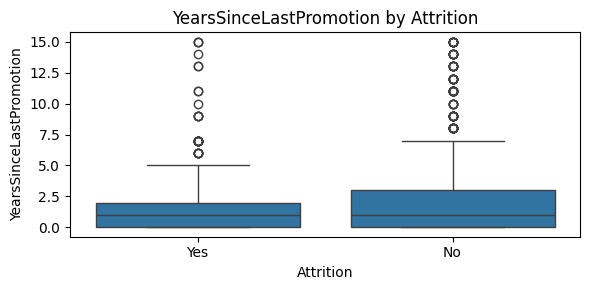

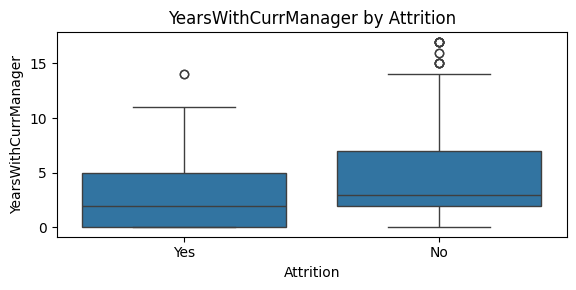

In [18]:
numerical_cols = HR.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != "Survival Prediction"]

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=HR, x="Attrition", y=col)
    plt.title(f"{col} by Attrition")
    plt.tight_layout()
    plt.show()

Upon initial inspection, variables Age, DailyRate, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWith CurrManager possibly seem to be affecting Attrition - the target variable.

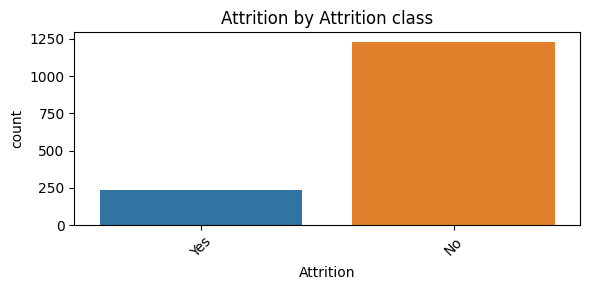

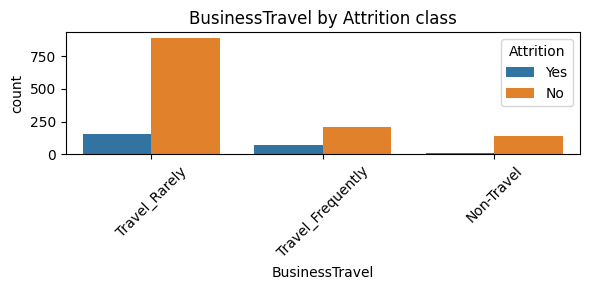

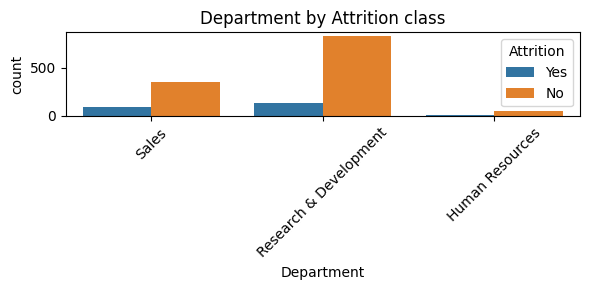

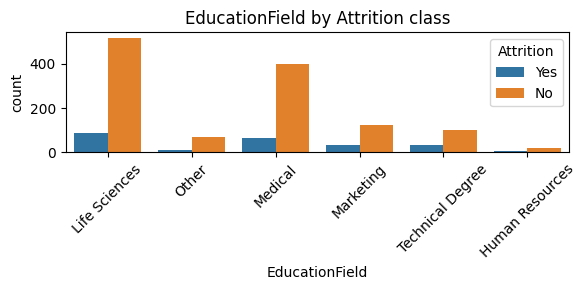

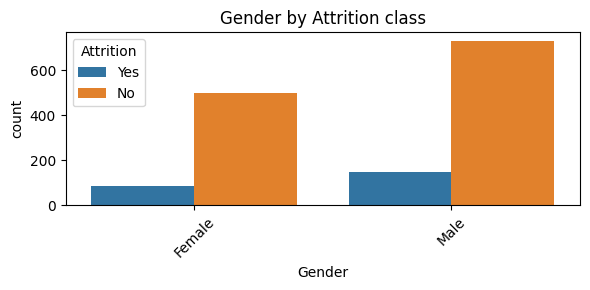

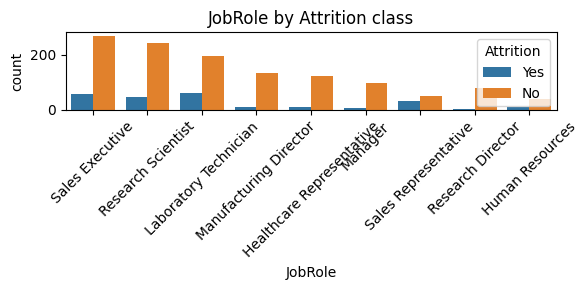

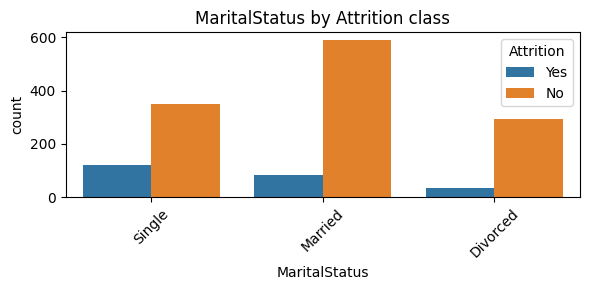

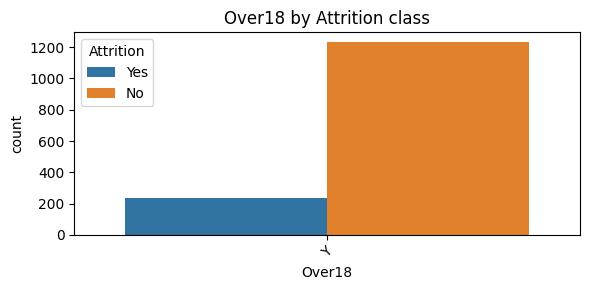

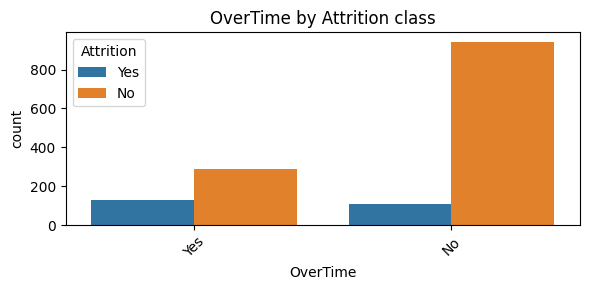

In [19]:
categorical_cols = HR.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=HR, x=col, hue="Attrition")
    plt.title(f"{col} by Attrition class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.

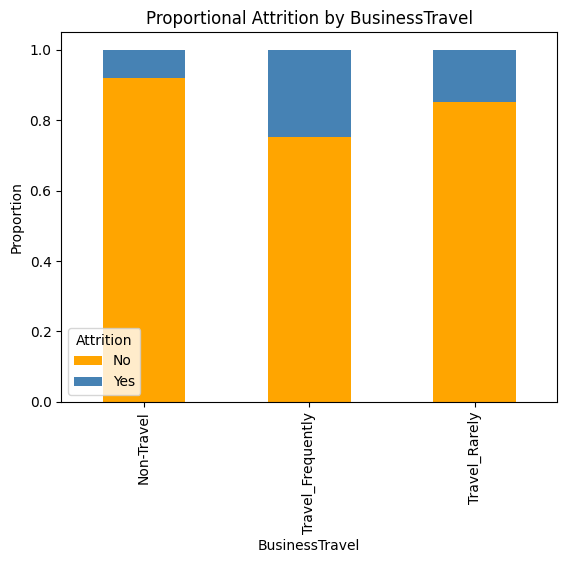

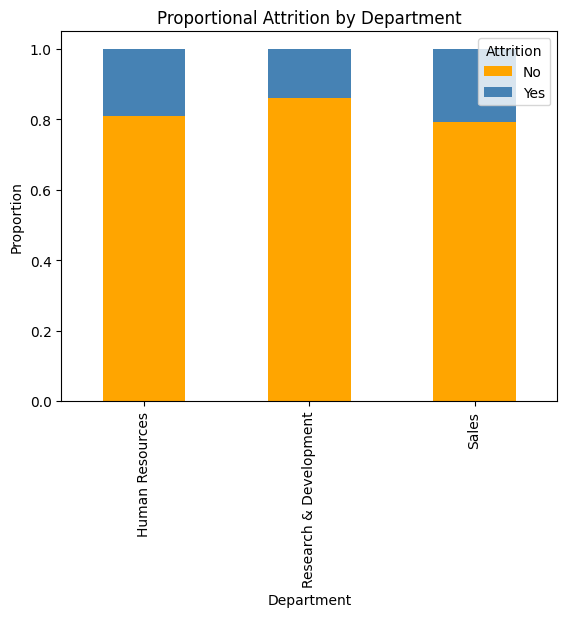

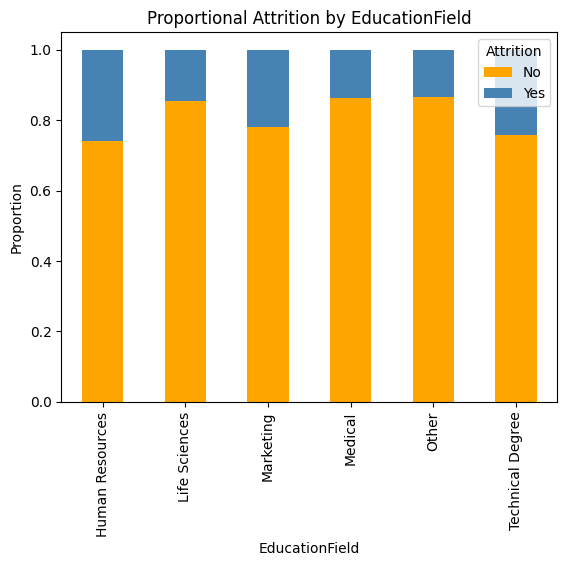

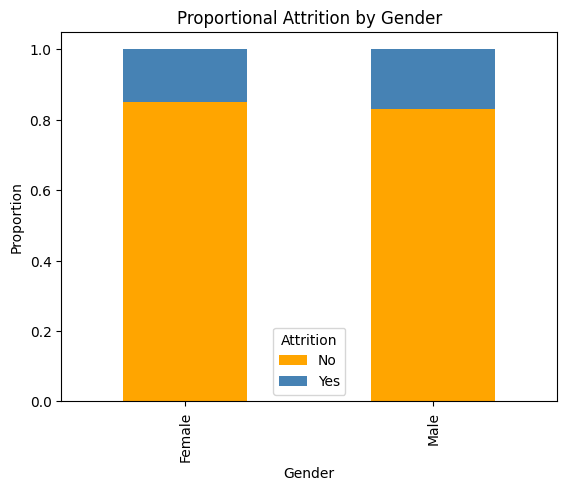

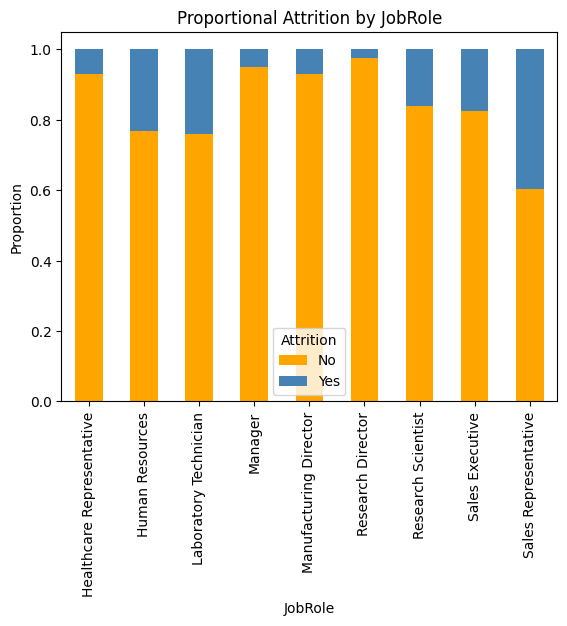

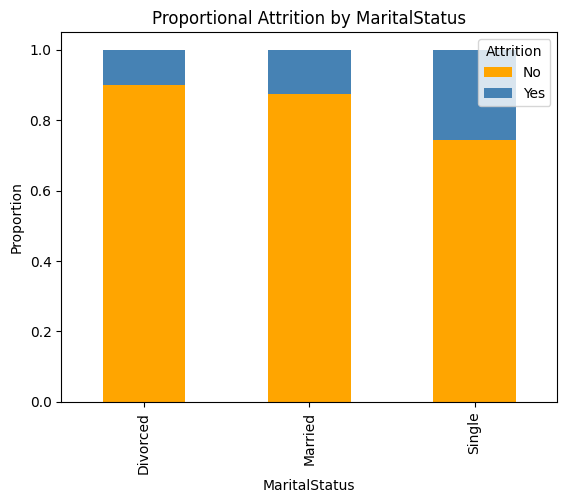

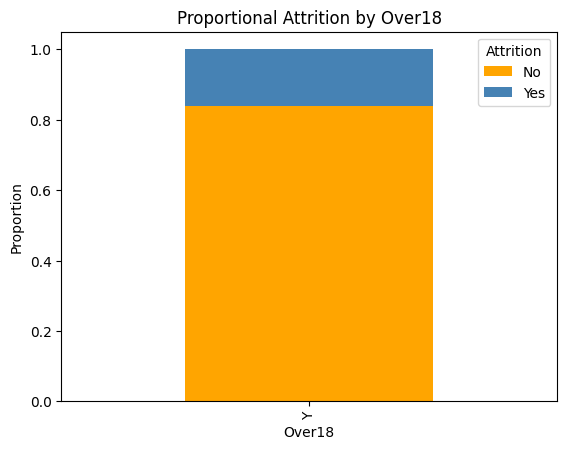

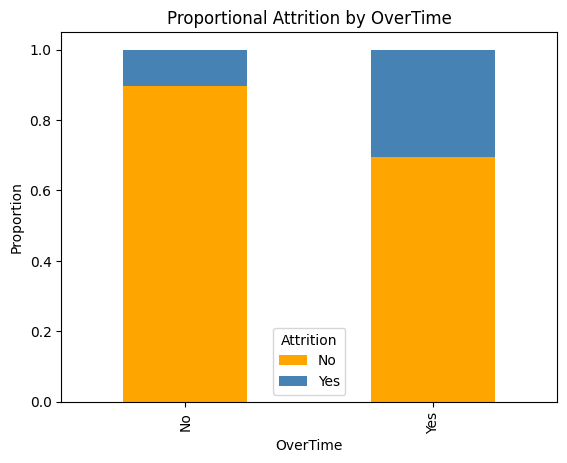

In [20]:
for col in HR.select_dtypes(include='object').drop(columns='Attrition').columns:
  region_crosstab = pd.crosstab(HR[col], HR['Attrition'], normalize='index')
  region_crosstab.plot(kind='bar', stacked=True, color=['orange', 'steelblue'])
  plt.title(f'Proportional Attrition by {col}')
  plt.ylabel('Proportion')
  plt.show()

The categorical variables seemingly related to Attrition are BusinessTravel, EducationField, JobRole, MaritalStatus, and OverTime.

In [ ]:
# Perform encoding of categorical variables so we can perform .corr() on all variables with Attrition
# Yes, No -> 1, 0
# Cat1, Cat2, Cat3 -> 0, 1, 2

# This will probably solve the problems below?

In [26]:
#HR.corr(method='spearman') # doesn't work

correlation = HR.corr(method='spearman', numeric_only=True)
correlation

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007290,-0.019291,0.204937,NaN,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471902,0.017451,0.353213,0.007709,0.000093,0.046063,NaN,0.056633,0.656896,0.000316,-0.003707,0.251686,0.197978,0.173647,0.194818
DailyRate,0.007290,1.000000,-0.002754,-0.013607,NaN,0.018961,0.023511,0.042469,0.003816,0.027829,0.016260,-0.032360,0.036548,0.025070,0.000624,0.009685,NaN,0.038514,0.020951,-0.011339,-0.040352,-0.009778,0.007208,-0.037631,-0.004717
DistanceFromHome,-0.019291,-0.002754,1.000000,0.015708,NaN,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002512,0.039618,-0.009592,0.029666,0.011320,0.005852,NaN,0.030190,-0.002912,-0.024848,-0.020402,0.010513,0.013708,-0.004685,0.004448
Education,0.204937,-0.013607,0.015708,1.000000,NaN,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.120028,-0.021214,0.135103,0.004300,-0.025081,-0.013173,NaN,0.013794,0.162177,-0.023749,0.017350,0.064196,0.054567,0.032203,0.051292
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.009820,0.018961,-0.010401,-0.027625,NaN,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015163,0.037477,0.006151,-0.030489,-0.029160,0.005353,NaN,0.009826,-0.013882,-0.011659,0.027169,0.008425,0.020140,0.026082,-0.001732
HourlyRate,0.028858,0.023511,0.020446,0.014432,NaN,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.019762,-0.014888,0.019209,-0.009876,-0.002185,0.000259,NaN,0.050543,-0.012072,0.000292,-0.010003,-0.029032,-0.034016,-0.052412,-0.013811
JobInvolvement,0.034456,0.042469,0.034430,0.037231,NaN,-0.015301,0.043884,1.000000,-0.018424,-0.012148,-0.024552,-0.018117,0.015448,-0.016999,-0.024733,0.037857,NaN,0.034464,0.006444,0.002014,-0.019889,0.013836,0.015548,-0.008307,0.037397
JobLevel,0.489618,0.003816,0.022148,0.107419,NaN,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,0.920429,0.052792,0.178270,-0.032453,-0.018608,0.011311,NaN,0.047786,0.734678,-0.019729,0.040466,0.472283,0.391085,0.269096,0.370889
JobSatisfaction,-0.005185,0.027829,-0.013078,-0.005175,NaN,-0.002993,-0.068340,-0.012148,-0.000852,1.000000,0.004881,-0.002702,-0.051516,0.023970,0.006979,-0.014679,NaN,0.012785,-0.015875,-0.011681,-0.029781,0.012280,0.000531,0.007497,-0.016772


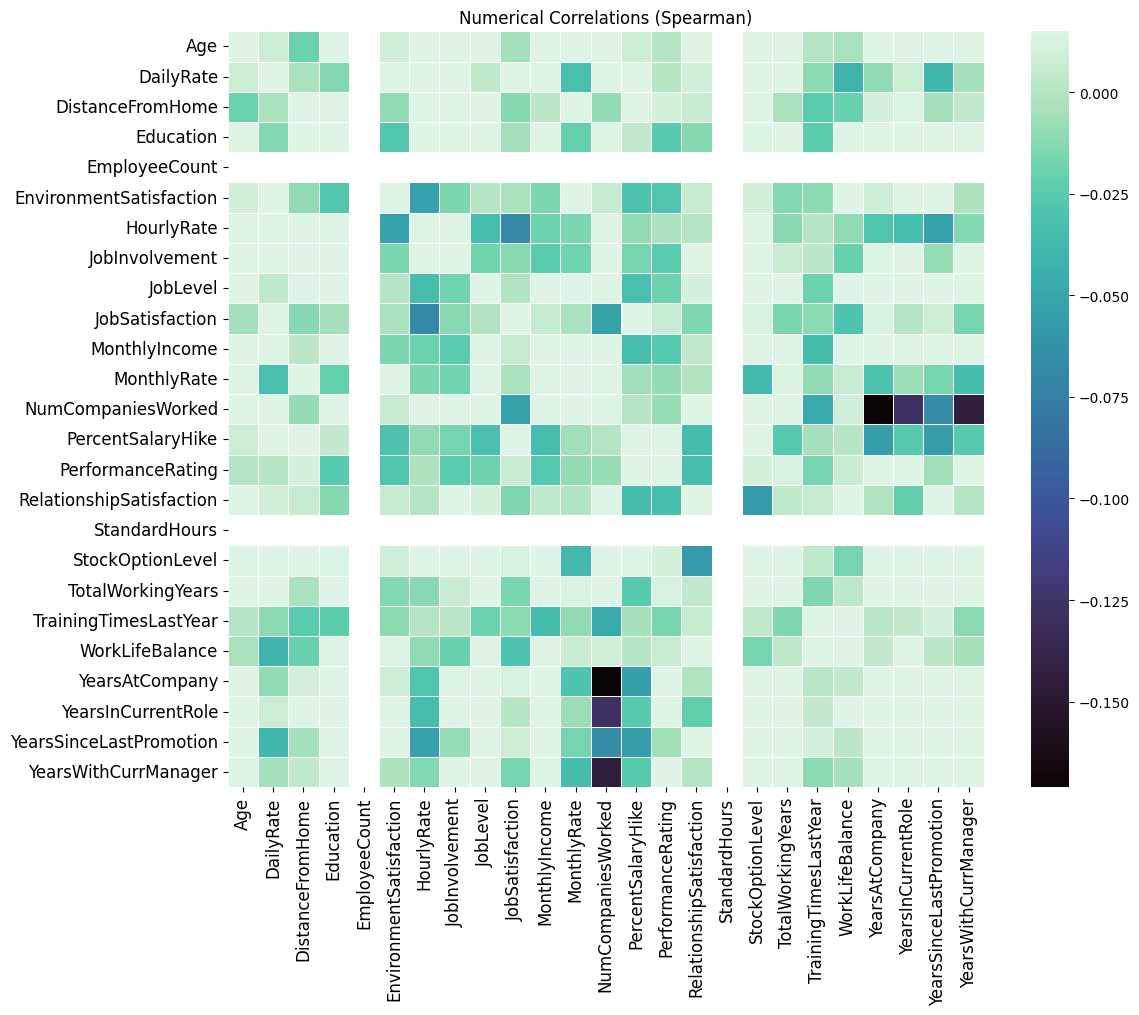

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False)
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# The graph above does not tell us the correlation with the target variable, because it is not encoded (it's not numeric)

# However, we now know that there are not major correlations between the numerical variables, I suppose, so we can keep them all.

# Perhaps we could remove EmployeeCount and StandardHours, as they seem to be constant. 

In [29]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

C:\Users\RitaML\AppData\Local\Temp\ipykernel_195484\3273364093.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\RitaML\AppData\Local\Temp\ipykernel_195484\3273364093.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\RitaML\AppData\Local\Temp\ipykernel_195484\3273364093.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\RitaML\AppData\Local\Temp\ipykernel_195484\3273364093.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\RitaML\AppData\Local\Temp\ipykernel_195484\3273364093.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\RitaML\AppData\Local\Temp\ipykernel_195484\3273364093.py

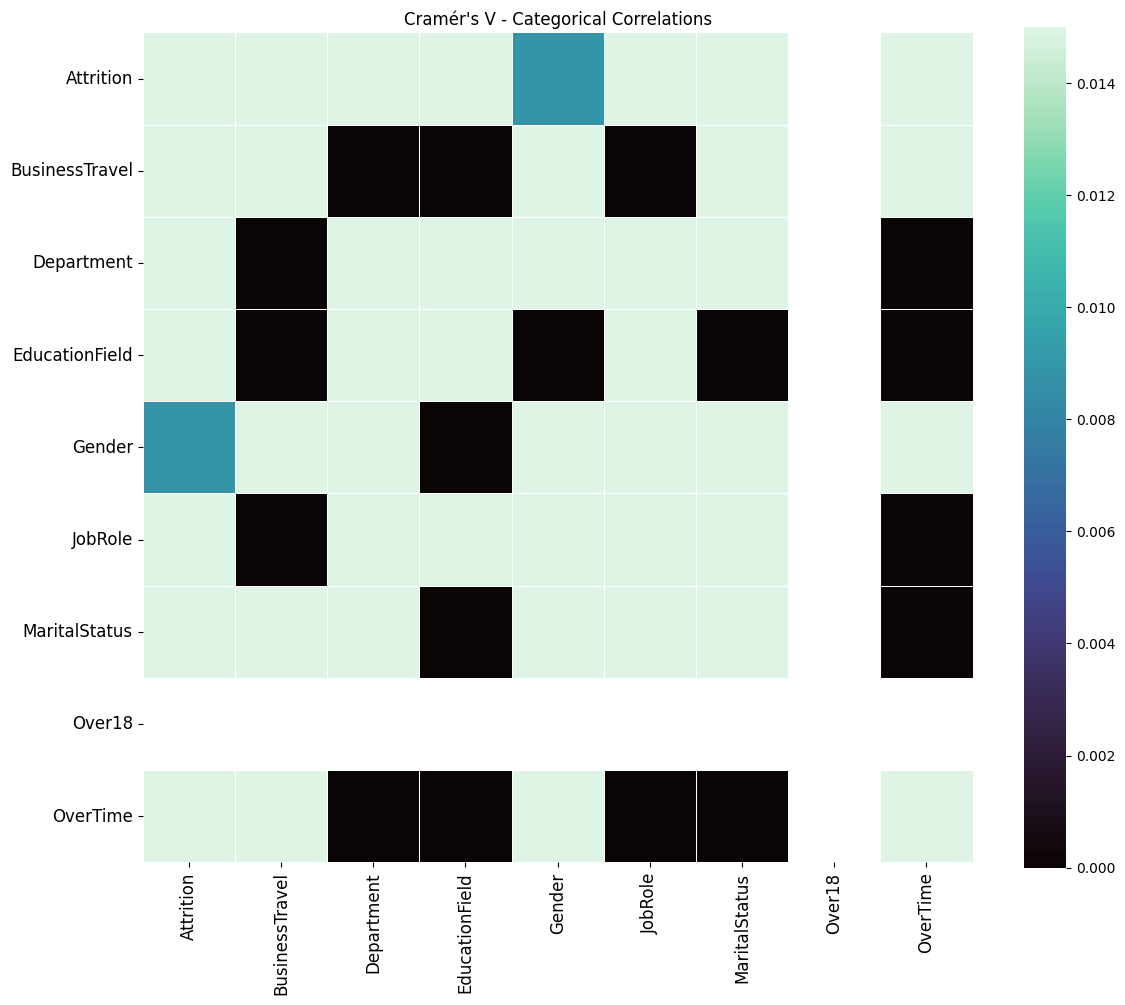

In [30]:
# Categorical-Categorical correlation (Cramér's V)
cat_cols = HR.select_dtypes(include='object').columns
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        conf_matrix = pd.crosstab(HR[col1], HR[col2])
        cramer_matrix.loc[col1, col2] = cramers_v(conf_matrix)

cramer_matrix = cramer_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cramer_matrix, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False)
plt.title("Cramér's V - Categorical Correlations")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures) if len(cat_measures) > 0 else 0
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    return np.sqrt(numerator / denominator)

In [25]:
num_cols = HR.select_dtypes(include=['float64']).columns
cat_cols = HR.select_dtypes(include=['object']).columns
cat_num_corr = pd.DataFrame(index=cat_cols, columns=num_cols)

for cat in cat_cols:
    for num in num_cols:
        cat_num_corr.loc[cat, num] = correlation_ratio(HR[cat].values, HR[num].values)

cat_num_corr = cat_num_corr.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(cat_num_corr, vmax=0.015, cmap="mako", linewidths=0.5, annot=True)
plt.title("Correlation Ratio (η²) - Categorical vs Numerical")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

## **4. Feature Engineering**

In [ ]:
# Rita: lembram-se de alguma coisa que possamos fazer para feature engineering?

## **5. Feature Selection**

# **Part IV. Predictive Modelling**

Model Selection:
- Start with basic models (e.g., Logistic Regression) to establish a performance baseline.
- Experiment with more complex models such as Decision Trees, Random Forests, Gradient Boosting Machines, and Neural Networks.

Model Tuning:
- Perform hyperparameter tuning using Grid Search or Random Search with cross-validation to optimize model performance.
- Address overfitting through techniques such as cross-validation, regularization, or pruning.

Model Evaluation:
- Evaluate models using a comprehensive set of metrics: accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.
- Perform a detailed error analysis to understand the model’s strengths and weaknesses, particularly in predicting minority classes (e.g., those at high risk
of attrition).

Model Interpretation:
- Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret complex models and explain predictions to non-technical stakeholders.

In [ ]:
# oof, até tenho pesadelos com isto

In [ ]:
# subset HR into train, test and validation (80, 10, 10?)

# 5. Prescriptive Analytics and Recommendations

- Insights Derivation: Based on the model’s predictions, derive actionable insights. For example, identify the top factors leading to attrition and propose
specific interventions.
- Scenario Analysis: Conduct what-if scenarios to simulate the impact of different interventions on attrition rates.
- Strategic Recommendations: Provide a set of clear, evidence-based recommendations for HR and management. For example, suggest targeted retention strategies such as personalized development plans for at-risk employees, or changes in compensation structures.

In [ ]:
# Maybe we don't need code here

# 6. Model Deployment (Optional)

Deploy the best-performing model using Hugging Face Spaces or a similar platform.

# 7. Final Presentation and Reporting

Presentation Structure:
- Introduction: Briefly introduce the business problem, objectives, and approach.
- EDA and Feature Engineering: Summarize key findings from your data exploration and the rationale behind your feature engineering choices.
- Modeling and Evaluation: Discuss the models you developed, their performance metrics, and why the final model was selected.
- Recommendations: Present your strategic recommendations based on the model’s insights.

Slide Deck:
- Create a professional slide deck with a logical flow, clear visuals, and concise explanations.
- Prepare backup slides with additional data and analysis for potential questions or deep